In [36]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data
n = 300
income = np.random.randint(10000, 200000, n)   # Income in Indian Rupees
spend = np.random.randint(1000, 200000, n)     # Spend in Indian Rupees

# Create DataFrame
data = pd.DataFrame({
    "INCOME": income,
    "SPEND": spend
})

# Save as CSV
data.to_csv("indian_income_spend.csv", index=False)

# Show first few rows
print(data.head())


   INCOME   SPEND
0  131958  193207
1  156867   51108
2  141932  113296
3  113694   95179
4  129879   91272


In [2]:
import os
print(os.getcwd())


C:\Users\User


In [37]:
data = pd.read_csv(r"C:\Users\User\indian_income_spend.csv")
print(data.head())


   INCOME   SPEND
0  131958  193207
1  156867   51108
2  141932  113296
3  113694   95179
4  129879   91272


In [38]:
import numpy as np
income = data['INCOME'].values
spend = data['SPEND'].values
X = np.array(list(zip(income,spend)))

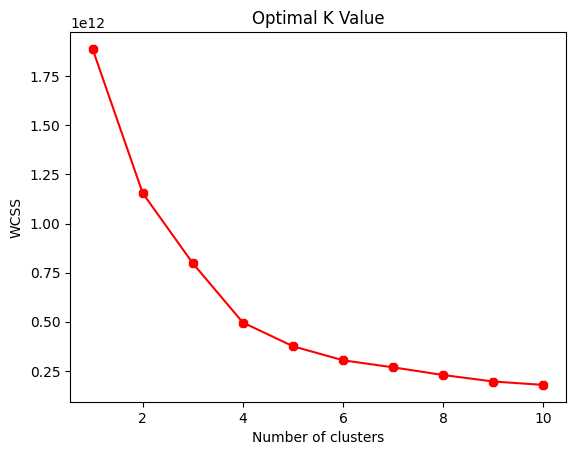

In [39]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = [] # within clusters sum of squares
for i in range(1,11):
    km = KMeans(n_clusters = i )
    km.fit(X)
    wcss.append(km.inertia_) # which gives value of wcss for that cluster
plt.plot(range(1,11),wcss,color="red", marker ="8")# LOW X AND Y IS GOOD CLUSTER FOR MODEL
plt.title('Optimal K Value')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
    

In [40]:
model = KMeans(n_clusters = 4)
y_means = model.fit_predict(X)


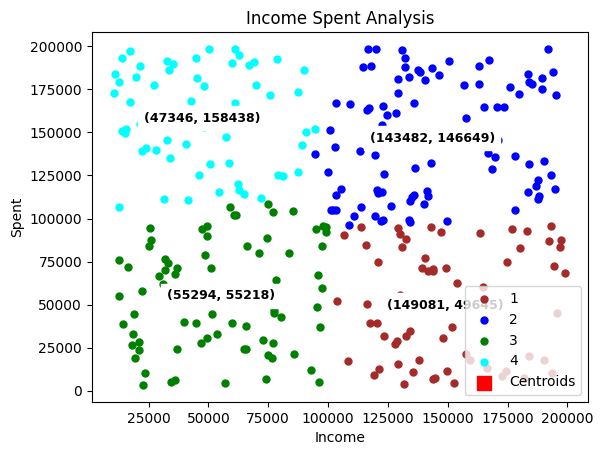

In [41]:
plt.scatter(X[y_means==0,0], X[y_means==0,1], s=25, c='brown', label='1')
plt.scatter(X[y_means==1,0], X[y_means==1,1], s=25, c='blue', label='2')
plt.scatter(X[y_means==2,0], X[y_means==2,1], s=25, c='green', label='3')
plt.scatter(X[y_means==3,0], X[y_means==3,1], s=25, c='cyan', label='4')

# Plot centroids
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, marker='s', c='red', label='Centroids')


plt.title('Income Spent Analysis')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.legend()
plt.show()


In [45]:
new_data = [[47300,15800],[149000,49645],[55000,754000]]
prediction = model.predict(new_data)
print(prediction)

[2 0 3]
